## Observations and Insights 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [83]:
# Check the number of mice uning .nunique method
mouse_count = pd.DataFrame({"Mouse Count": [mouse_study_df["Mouse ID"].nunique()]})

#remove index assignment for prettier appearence 
mouse_count.set_index('Mouse Count',inplace=True)

#print observations above the dataframe for clean and professional look
mouse_count_print = len(mouse_study_df["Mouse ID"].unique())
print(len(mouse_study_df), "records where found in the dataframe,")
print("with a count of", mouse_count_print, "unique Mouse ID records.")

#display dataframe with mouse count
mouse_count

1893 records where found in the dataframe,
with a count of 249 unique Mouse ID records.


""
Mouse Count
249


In [73]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. subset= find duplicates in specified columns 
duplicate_IDs = mouse_study_df[['Mouse ID', 'Timepoint']]

#use dataframe.duplicated to find duplicate ID using .duplicated
duplicate_IDs = duplicate_IDs[duplicate_IDs.duplicated(subset=['Mouse ID', 'Timepoint'])]

#display duplicates in a dataframe
duplicate_IDs.head()



,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [75]:
# Optional: Get all the data for the duplicate mouse ID. 

#method below automatically searches for duplicates without manual labor
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
print("Below you can see all the information about the duplicate mice in this study")
duplicate_mice

Below you can see all the information about the duplicate mice in this study


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [84]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID and timepoint in study.
# dropped all known duplicates manually using isin and known duplicates
#cleaned_mice = mouse_study_df.loc[~mouse_study_df['Mouse ID'].isin(['g989'])].reset_index(drop=True)

#didnt like the above results so used a .drop_duplicates method, left the code just in case i wanted to refer to it later
cleaned_mice = mouse_study_df.drop_duplicates(inplace=False,keep=False,subset=['Mouse ID', 'Timepoint'])
cleaned_mice.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [81]:
# Checking the number of mice in the clean DataFrame.
print("There are", len(cleaned_mice), "rows in the cleaned dataframe after dropping duplicates.")
print(len(mouse_study_df)-len(cleaned_mice), "duplicate record(s) were found.")

# generate df
num_clean_mice = pd.DataFrame({"Unique Mouse IDs" :[cleaned_mice['Mouse ID'].nunique()]})

#drop index #
num_clean_mice.set_index('Unique Mouse IDs',inplace=True)
num_clean_mice

There are 1883 rows in the cleaned dataframe after dropping duplicates.
10 duplicate record(s) were found.


""
Unique Mouse IDs
249


## Summary Statistics

In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = cleaned_mice.groupby('Drug Regimen')['Tumor Volume (mm3)']

#easiest path to producing desired calculations within a dataframe using pandas
tumor_volume = pd.DataFrame({
'Count': drug_regimen.count(),
'Mean': drug_regimen.mean(),
'Median': drug_regimen.median(),
'Variance': drug_regimen.var(),
'Standard Deviation': drug_regimen.std(),
'SEM': drug_regimen.sem()
})
print("TUMOR SUMMARY STATISTICS TABLE")
tumor_volume




TUMOR SUMMARY STATISTICS TABLE


,Count,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,151,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [90]:
#this is the aggregate method
summary_table = cleaned_mice.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Treatments/Measurments')

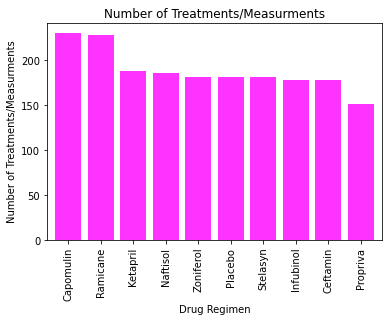

In [157]:
cleaned_mice['Drug Regimen'].value_counts().plot(kind='bar',align='center',width=0.8, alpha=0.8, color='fuchsia')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Treatments/Measurments')
plt.title('Number of Treatments/Measurments')

Text(0.5, 1.0, 'Number of Treatments/Measurments')

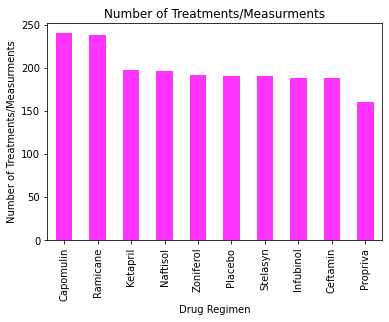

In [161]:
#matplot
#find drugs used
x_plot = cleaned_mice['Drug Regimen'].value_counts()

#find mice experimented on for each regimen
y_plot = tumor_volume['Count'].count()

#assemble plot
plot_data = x_plot.add(y_plot, fill_value=0)
plot_data.plot(kind="bar", alpha=0.8, facecolor="fuchsia")

#format plot
plt.ylabel('Number of Treatments/Measurments')
plt.xlabel('Drug Regimen')
plt.title('Number of Treatments/Measurments')

Method generated using pandas


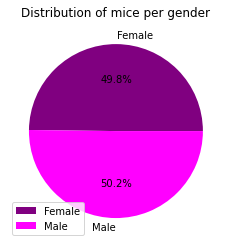

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = cleaned_mice.groupby(["Sex"])
mouse_gender_count = mouse_gender["Mouse ID"].nunique()
labels = ["Female", "Male"]
colors = ["purple", "fuchsia"]
mouse_gender_count.plot.pie(title='Distribution of mice per gender', colors=colors, autopct="%1.1f%%")
plt.ylabel('')
plt.legend(loc=3)
print('Method generated using pandas')

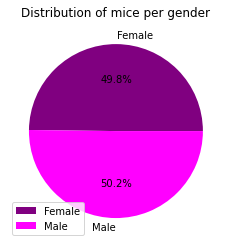

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode 
plt.pie(mouse_gender_count,colors=colors, labels=labels, autopct="%1.1f%%")
plt.title("Distribution of mice per gender")
plt.legend(loc=3)
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
